In [24]:
import sys
sys.path.append("..")
from hists.dataframe import *
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
input_data = '/data_cms_upgrade/cuisset/testbeam18/clue3d/v13/default/data/CLUE_clusters.root'
input_sim_proton = '/data_cms_upgrade/cuisset/testbeam18/clue3d/v13/default/sim_proton/CLUE_clusters.root'
input_sim_noproton = '/data_cms_upgrade/cuisset/testbeam18/clue3d/v13/default/sim_proton/CLUE_clusters.root'

In [3]:
array_data = next(uproot.iterate(input_data + ":clusters", step_size="100MB", library="ak"))
array_sim_proton = next(uproot.iterate(input_sim_proton + ":clusters", step_size="100MB", library="ak"))
array_sim_noproton = next(uproot.iterate(input_sim_noproton + ":clusters", step_size="100MB", library="ak"))

In [4]:
pd.set_option('display.max_rows', 100)

In [5]:
comp_data = DataframeComputations(array_data)
comp_sim_proton = DataframeComputations(array_sim_proton)
comp_sim_noproton = DataframeComputations(array_sim_noproton)

In [6]:
comp_data.rechits["rechits_y"].value_counts().sort_index().index

Float64Index([         -6.1884765625,          -5.6259765625,
                       -5.0634765625,          -4.5009765625,
                      -3.93798828125,         -3.37548828125,
                      -2.81298828125,         -2.25048828125,
                     -1.687744140625,        -1.125244140625,
                    -0.5626220703125,  -9.00961458683014e-06,
              -9.007751941680908e-06, -9.004026651382446e-06,
              -9.000301361083984e-06, -8.996576070785522e-06,
               -8.99285078048706e-06, -8.989125490188599e-06,
                     0.5626220703125,         1.125244140625,
                      1.687744140625,          2.25048828125,
                       2.81298828125,          3.37548828125,
                       3.93798828125,           4.5009765625,
                        5.0634765625,           5.6259765625,
                        6.1884765625],
             dtype='float64')

In [7]:
comp_sim_proton.rechits["rechits_y"].value_counts().sort_index().index

Float64Index([ -6.171527862548828,  -5.610479831695557,  -5.049431800842285,
               -4.488383769989014,  -3.927335739135742,   -3.36628794670105,
              -2.8052399158477783,  -2.244191884994507,  -1.683143973350525,
              -1.1220959424972534, -0.5610479712486267,                 0.0,
               0.5610479712486267,  1.1220959424972534,   1.683143973350525,
                2.244191884994507,  2.8052399158477783,    3.36628794670105,
                3.927335739135742,   4.488383769989014,   5.049431800842285,
                5.610479831695557,   6.171527862548828],
             dtype='float64')

In [8]:
def merge_closeby(l, eps=1e-6): # TODO the last element gets removed (not intended)
    res = []
    for cur, next in zip(l, l[1:]):
        if abs(next-cur) > eps:
            res.append(cur)
    return np.array(res) 

In [9]:
def plotDiff(colName, comp1, comp2):
    val_1 = comp1.rechits[colName].value_counts().sort_index().index.to_numpy()
    val_2 = comp2.rechits[colName].value_counts().sort_index().index.to_numpy()
    diff = merge_closeby(val_2)-merge_closeby(val_1)
    plt.plot(merge_closeby(val_1), diff)
    plt.xlabel(colName + " (cm)")
    plt.ylabel(colName + " position difference (cm)")
    plt.grid()

Text(0.5, 1.0, 'Data-sim_proton')

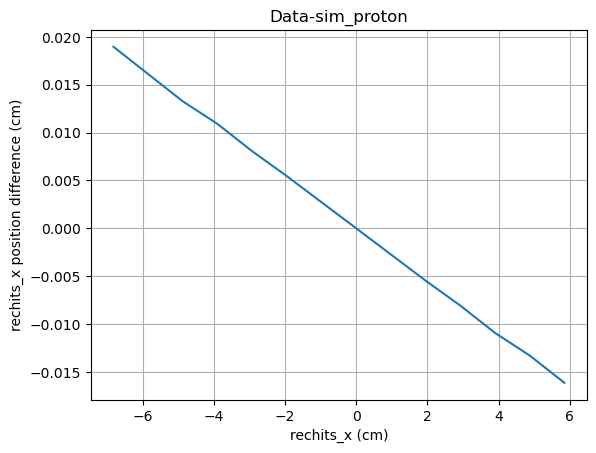

In [10]:
plotDiff("rechits_x", comp_data, comp_sim_proton)
plt.title("Data-sim_proton")

Text(0.5, 1.0, 'Data-sim_proton')

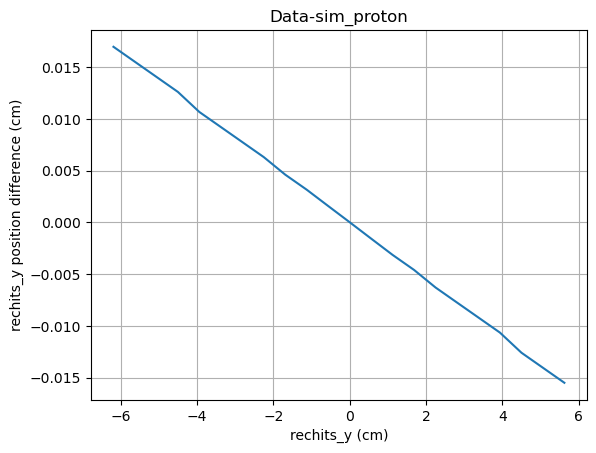

In [11]:
plotDiff("rechits_y", comp_data, comp_sim_proton)
plt.title("Data-sim_proton")

Text(0.5, 1.0, 'Data-sim_no_proton')

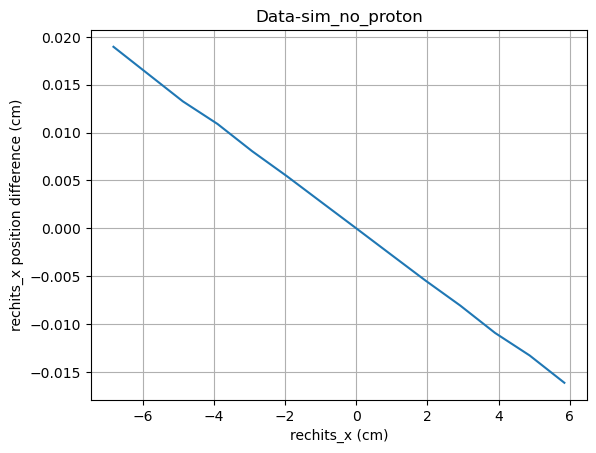

In [12]:
plotDiff("rechits_x", comp_data, comp_sim_noproton)
plt.title("Data-sim_no_proton")

In [13]:
comp_sim_noproton.rechits["rechits_y"].value_counts().sort_index().index.to_numpy()

array([-6.17152786, -5.61047983, -5.0494318 , -4.48838377, -3.92733574,
       -3.36628795, -2.80523992, -2.24419188, -1.68314397, -1.12209594,
       -0.56104797,  0.        ,  0.56104797,  1.12209594,  1.68314397,
        2.24419188,  2.80523992,  3.36628795,  3.92733574,  4.48838377,
        5.0494318 ,  5.61047983,  6.17152786])

In [55]:
comp_data.rechits.value_counts(["rechits_x", "rechits_y"]).index.to_numpy()

array([(-1.948974609375, 3.37548828125),
       (-1.948974609375, 1.125244140625),
       (-2.92333984375, 1.687744140625), (-1.948974609375, 2.25048828125),
       (-0.9744873046875, 1.687744140625),
       (-2.92333984375, 0.5626220703125),
       (-1.948974609375, -8.996576070785522e-06),
       (-0.9744873046875, 0.5626220703125),
       (-2.92333984375, 2.81298828125), (-0.9744873046875, 2.81298828125),
       (-3.89794921875, 1.125244140625), (-3.89794921875, 2.25048828125),
       (-8.998438715934753e-06, 1.125244140625),
       (-2.92333984375, -0.5626220703125),
       (-8.996576070785522e-06, 2.25048828125),
       (-3.89794921875, -8.99285078048706e-06),
       (-0.9744873046875, -0.5626220703125),
       (-1.948974609375, -1.125244140625),
       (-9.000301361083984e-06, -9.000301361083984e-06),
       (-3.89794921875, 3.37548828125), (-2.92333984375, 3.93798828125),
       (-0.9744873046875, 3.93798828125), (-4.8720703125, 1.687744140625),
       (-8.994713425636292e-06, 3

In [58]:
def make_distances(comp):
    pos = comp.rechits.value_counts(["rechits_x", "rechits_y"]).index.to_numpy()
    return set((math.sqrt((x1-x2)**2 + (y1-y2)**2) for (x1, y1) in pos for (x2, y2) in pos))

In [83]:
eps=1e-3

In [84]:
merge_closeby(sorted(make_distances(comp_data)), eps=eps)

array([ 1.12553065,  1.94914542,  2.25069503,  2.97727058,  3.37578643,
        3.8979737 ,  4.05720424,  4.50097948,  4.90485407,  5.15654362,
        5.62627002,  5.84693601,  5.95426252,  6.2650837 ,  6.75145078,
        6.84459186,  7.0271484 ,  7.3787119 ,  7.79591918,  7.87672244,
        8.11423919,  8.49538709,  8.78832859,  8.93133785,  9.00193888,
        9.21052101,  9.61407259,  9.7445762 ,  9.80965027, 10.00126958,
       10.12707045, 10.31301653, 10.73413612, 10.85131152, 11.08222266,
       11.25220654, 11.41983824, 11.69366058, 11.74771246, 11.85504536,
       11.90845047, 12.17087601, 12.37743198, 12.52982406, 12.68047288,
       12.78011002, 12.97655663, 13.64226107])

In [85]:
merge_closeby(sorted(make_distances(comp_sim_proton)), eps=eps)

array([ 1.12209599,  1.94352735,  2.24419198,  2.96878702,  3.36628797,
        3.88705449,  4.04577463,  4.48838396,  4.891103  ,  5.14208977,
        5.61047986,  5.83058173,  5.9375738 ,  6.24756599,  6.73257581,
        6.82544335,  7.00748715,  7.35807534,  7.77410898,  7.8546718 ,
        8.09154915,  8.4716388 ,  8.76384972,  8.90636069,  8.97676773,
        9.18475137,  9.58719223,  9.71763612,  9.7822059 ,  9.97340719,
       10.09886372, 10.28417946, 10.70411338, 10.82110161, 11.05136365,
       11.22095968, 11.38803029, 11.66116326, 11.71502589, 11.82201463,
       11.87514752, 12.13732367, 12.34305561, 12.49513196, 12.64537933,
       12.74456034, 12.94064206, 13.60469061])

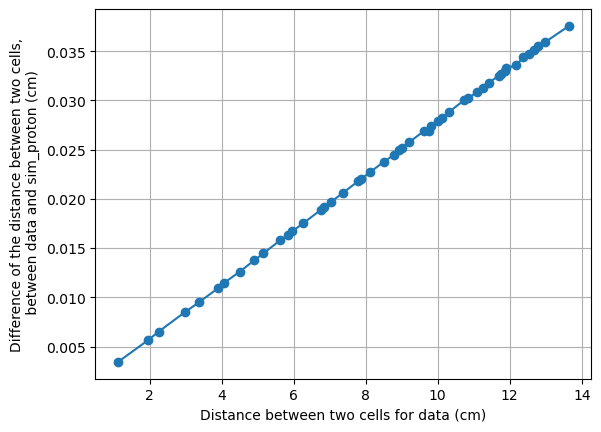

In [92]:
plt.plot(merge_closeby(sorted(make_distances(comp_data)), eps=eps),
    merge_closeby(sorted(make_distances(comp_data)), eps=eps)-merge_closeby(sorted(make_distances(comp_sim_proton)), eps=eps),
    'o-')
plt.xlabel("Distance between two cells for data (cm)")
plt.ylabel("Difference of the distance between two cells,\n between data and sim_proton (cm)")
plt.grid()

In [91]:
merge_closeby(sorted(make_distances(comp_data)), eps=eps)

array([ 1.12553065,  1.94914542,  2.25069503,  2.97727058,  3.37578643,
        3.8979737 ,  4.05720424,  4.50097948,  4.90485407,  5.15654362,
        5.62627002,  5.84693601,  5.95426252,  6.2650837 ,  6.75145078,
        6.84459186,  7.0271484 ,  7.3787119 ,  7.79591918,  7.87672244,
        8.11423919,  8.49538709,  8.78832859,  8.93133785,  9.00193888,
        9.21052101,  9.61407259,  9.7445762 ,  9.80965027, 10.00126958,
       10.12707045, 10.31301653, 10.73413612, 10.85131152, 11.08222266,
       11.25220654, 11.41983824, 11.69366058, 11.74771246, 11.85504536,
       11.90845047, 12.17087601, 12.37743198, 12.52982406, 12.68047288,
       12.78011002, 12.97655663, 13.64226107])

In [93]:
merge_closeby(sorted(make_distances(comp_sim_proton)), eps=eps)

array([ 1.12209599,  1.94352735,  2.24419198,  2.96878702,  3.36628797,
        3.88705449,  4.04577463,  4.48838396,  4.891103  ,  5.14208977,
        5.61047986,  5.83058173,  5.9375738 ,  6.24756599,  6.73257581,
        6.82544335,  7.00748715,  7.35807534,  7.77410898,  7.8546718 ,
        8.09154915,  8.4716388 ,  8.76384972,  8.90636069,  8.97676773,
        9.18475137,  9.58719223,  9.71763612,  9.7822059 ,  9.97340719,
       10.09886372, 10.28417946, 10.70411338, 10.82110161, 11.05136365,
       11.22095968, 11.38803029, 11.66116326, 11.71502589, 11.82201463,
       11.87514752, 12.13732367, 12.34305561, 12.49513196, 12.64537933,
       12.74456034, 12.94064206, 13.60469061])

In [94]:
1.12553065-1.12209599

0.0034346599999999228